In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
freq = "1H"

min    max  mean  jitter  n_threshold      n  \
day       hour minute                                                  
Monday    13   0       15.0  391.8  34.2    30.1          212   4800   
          14   0       15.0  396.3  35.2    31.2          850  19400   
          15   0       16.5  425.3  35.3    30.4          833  19400   
          16   0       15.0  404.3  35.7    29.5          847  19400   
          17   0       15.0  387.5  35.4    28.5          741  17100   
          18   0       21.0  407.0  34.5    25.0          197   5000   
          20   0       15.0  404.3  35.9    27.9          172   3900   
          21   0       14.0  412.3  36.0    27.6          845  19400   
          22   0       15.0  426.5  37.2    28.3          860  19200   
          23   0       22.5  413.0  38.8    30.4          867  19000   
Tuesday   0    0       23.0  420.5  40.6    32.7          874  18800   
          1    0       15.0  430.0  41.9    34.4          889  18700   
          2    0       15.0  429.0  42.4    34.4          899  18700   
          3    0       14.5  433.0  42.4    33.1          900  18700   
          4    0       15.0  402.0  42.3    32.2          886  18600   
          5    0       15.0  411.0  42.2    30.7          878  18700   
          6    0       15.0  429.0  42.5    30.5          877  18500   
          7    0       15.0  409.5  42.8    29.7          887  18700   
          8    0       15.0  420.8  43.2    29.8          883  18500   
          9    0       15.0  414.5  43.7    29.3          859  18600   
          10   0       15.0  412.5  43.4    31.0          858  18100   
          11   0       14.0  399.0  34.4    30.3          823  19300   
          12   0       15.0  414.8  35.4    30.6          843  19400   
          13   0       16.0  394.8  35.6    29.7          836  19300   
          14   0       15.5  392.3  35.6    28.7          838  19400   
          15   0       20.8  403.3  35.8    27.5          840  19300   
          16   0       21.3  403.5  36.0    27.1          832  19400   
          17   0       22.0  428.6  37.0    27.9          846  19200   
          18   0       22.5  406.3  38.3    29.4          853  19100   
          19   0       23.0  428.0  40.1    31.6          876  18900   
          20   0       23.5  461.9  42.0    34.2          889  18700   
          21   0       24.0  439.0  42.5    34.4          900  18700   
          22   0       21.5  425.3  42.3    32.6          896  18600   
          23   0       22.0  417.5  42.5    31.0          886  18600   
Wednesday 0    0       23.0  443.0  42.5    30.3          883  18700   
          1    0       23.0  418.5  43.3    30.4          892  18500   
          2    0       24.0  407.0  44.2    30.8          898  18400   
          3    0       24.0  442.6  44.6    30.4          852  17500   
          4    0       25.0  458.0  46.5    33.3          869  18200   
          5    0       26.0  417.5  45.7    31.4          868  18300   
          6    0       29.0  414.6  46.4    32.5          866  18200   
          7    0       29.3  442.8  47.5    33.7          878  18200   
          8    0       30.0  419.5  48.1    33.8          867  18100   
          9    0       30.5  416.3  48.8    34.1          884  18100   
          10   0       31.0  447.0  49.2    33.6          570  11600   
          11   0       18.5   52.5  19.9     1.6            0  16700   
          12   0       19.0   49.0  20.6     1.6            0  21000   
          13   0       19.5   47.5  21.3     1.8            0  21000   
          14   0       20.2   60.0  22.2     2.1            0  20800   
          15   0       21.0   48.0  22.8     2.4            0   3000   

                       pct_above_threshold  
day       hour minute                       
Monday    13   0                      4.42  
          14   0                      4.38  
          15   0                      4.29  
          16   0                      4.37  
         

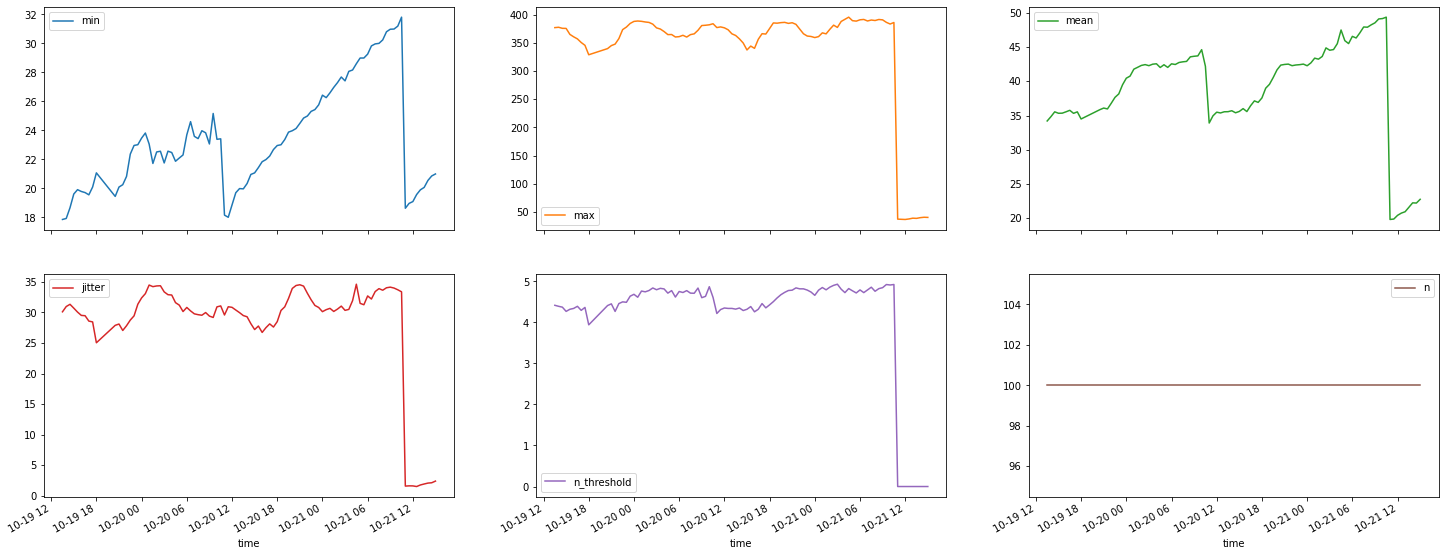

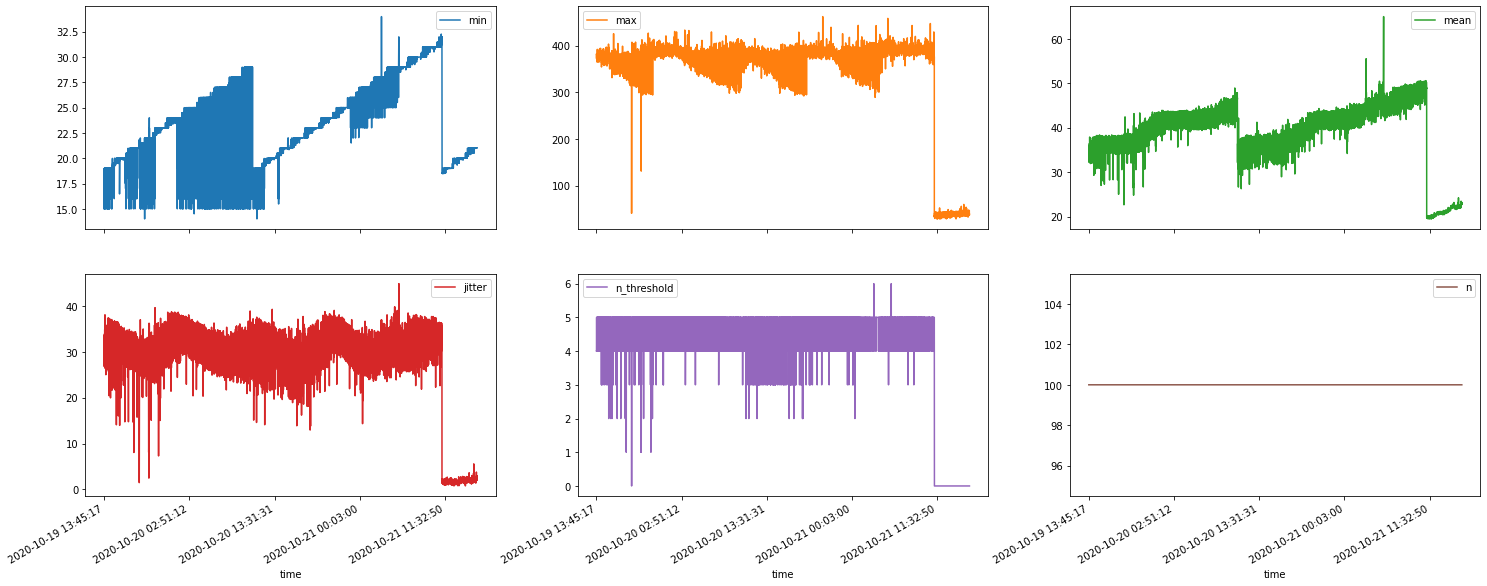

In [18]:
ping_data = pd.read_csv(
    "league_ping_data.csv",
    header=None,
    names=["time", "min", "max", "mean", "jitter", "n_threshold", "n"],
    index_col="time",
)
ping_data.groupby(
    by=[pd.DatetimeIndex(ping_data.index).floor("30 min").rename("time"),]
).mean().plot(subplots=True, figsize=(25, 10), layout=(2, 3))

ping_data.plot(subplots=True, figsize=(25, 10), layout=(2, 3))

summary_df = ping_data.groupby(
    by=[
        pd.DatetimeIndex(ping_data.index).floor(freq).day_name().rename("day"),
        pd.DatetimeIndex(ping_data.index).floor(freq).hour.rename("hour"),
        pd.DatetimeIndex(ping_data.index).floor(freq).minute.rename("minute"),
    ]
).agg(
    {
        "min": "min",
        "max": "max",
        "mean": "mean",
        "jitter": "mean",
        "n_threshold": "sum",
        "n": "sum",
    }
)
summary_df["pct_above_threshold"] = 100 * summary_df["n_threshold"] / summary_df["n"]
summary_df.round({"min": 1, "max": 1, "mean": 1, "jitter": 1, "pct_above_threshold": 2})